In [1]:
import numpy as np
import pandas as pd
import itertools
import string
import matplotlib.pyplot as plt

import ast

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import to_categorical

# Kaggle

In [5]:
df = pd.read_csv('/Users/sammy/Downloads/Chords/archive/chords_and_lyrics.csv')

In [7]:
df.head()

,Unnamed: 0,artist_name,song_name,chords&lyrics,chords,lyrics,tabs,lang,artist_id,followers,genres,popularity,name_e_chords
0,0,Justin Bieber,"10,000 Hours",\nCapo on 3rd fret\n\t \t\t \r\n\r\nVerse 1:\...,{3: 'G G/B ...,"{0: '\nCapo on 3rd fret\n\t \t\t ', 1: '', 2:...","{89: ""I-----, I'm gonna love you ""}",en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber
1,1,Justin Bieber,2 Much,\n\t \t\t\r\nIntro: F#m7 D2 \r\n\r\nVerse 1:...,"{1: 'Intro: F#m7 D2 ', 4: 'F#m7 ', 8: 'D2 ', ...","{0: '\n\t \t\t', 2: '', 3: 'Verse 1:', 5: ' ...",{},en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber
2,2,Justin Bieber,2u (feat. David Guetta),\n\t \t\t\r\nEm D C ...,{1: 'Em D C C...,"{0: '\n\t \t\t', 2: ""No limit in the sky that...",{},en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber
3,3,Justin Bieber,All Around The World,\nCapo on 4th fret\n\t \t\t\r\n\r\n \r\n\r\n ...,"{4: ' Intro: Em Bm Am C (2x) ', 6: ' ...","{0: '\nCapo on 4th fret\n\t \t\t', 1: '', 2: ...",{},en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber
4,4,Justin Bieber,All Around The World (acoustic),\n\t \t\t\r\n\r\nIntro: Gm - Dm - C - C x2 ...,"{2: 'Intro: Gm - Dm - C - C x2 ', 5: ' ...","{0: '\n\t \t\t', 1: '', 3: '', 4: 'verse 1: '...",{28: 'hide this tab e|--------------10--------...,en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber


In [39]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'song_name', 'chords&lyrics', 'chords',
       'lyrics', 'tabs', 'lang', 'artist_id', 'followers', 'genres',
       'popularity', 'name_e_chords'],
      dtype='object')

In [40]:
df['genres'].nunique()

4781

In [44]:
df2.loc[124592]

Unnamed: 0                                                  124592
artist_name                                            Ana Nóbrega
song_name                                           De Tal Maneira
chords&lyrics    \n\t  \t\tIntro: G  C  Em  D  C  G \r\n\r\n   ...
chords           {0: '\n\t  \t\tIntro: G  C  Em  D  C  G ', 2: ...
lyrics           {1: '', 3: 'De uma maneira tal ', 5: 'De um je...
tabs                                                            {}
lang                                                            pt
artist_id                                   5LCTcU1OktZQTuh4LFIdzU
followers                                                 387854.0
genres                            ['adoracao', 'brazilian gospel']
popularity                                                      53
name_e_chords                                          ana-nóbrega
Name: 124592, dtype: object

In [84]:
c = df2.loc[124592, 'chords']

In [85]:
len(c)

726

In [86]:
c

"{0: '\\n\\t  \\t\\tIntro: G  C  Em  D  C  G ', 2: '             G ', 4: '             G ', 6: '           C                    G ', 8: '          G                    G ', 10: '           C                 G ', 13: '         Am7 ', 15: '            G/B ', 17: '           C ', 19: '              D         G   D ', 21: '            Am7 ', 23: '             G/B ', 25: '      C ', 27: ' D ', 30: '          G   D ', 32: '          Em7   D ', 34: '          C             D ', 36: '                 G     D ', 39: '( G ) ', 41: 'Solo Em7  C  Am7  G  D ', 43: 'Am7 ', 45: '     Em7 ', 47: 'Am7 ', 49: '     C          D ', 52: 'Am7 ', 54: '     Em7 ', 56: 'Am7 ', 58: '       C          C         D ', 61: 'Final G  C  Em  D  C  G '}"

In [87]:
r = c.split()
#r = c.replace('\\', '').split()
r

['{0:',
 "'\\n\\t",
 '\\t\\tIntro:',
 'G',
 'C',
 'Em',
 'D',
 'C',
 'G',
 "',",
 '2:',
 "'",
 'G',
 "',",
 '4:',
 "'",
 'G',
 "',",
 '6:',
 "'",
 'C',
 'G',
 "',",
 '8:',
 "'",
 'G',
 'G',
 "',",
 '10:',
 "'",
 'C',
 'G',
 "',",
 '13:',
 "'",
 'Am7',
 "',",
 '15:',
 "'",
 'G/B',
 "',",
 '17:',
 "'",
 'C',
 "',",
 '19:',
 "'",
 'D',
 'G',
 'D',
 "',",
 '21:',
 "'",
 'Am7',
 "',",
 '23:',
 "'",
 'G/B',
 "',",
 '25:',
 "'",
 'C',
 "',",
 '27:',
 "'",
 'D',
 "',",
 '30:',
 "'",
 'G',
 'D',
 "',",
 '32:',
 "'",
 'Em7',
 'D',
 "',",
 '34:',
 "'",
 'C',
 'D',
 "',",
 '36:',
 "'",
 'G',
 'D',
 "',",
 '39:',
 "'(",
 'G',
 ')',
 "',",
 '41:',
 "'Solo",
 'Em7',
 'C',
 'Am7',
 'G',
 'D',
 "',",
 '43:',
 "'Am7",
 "',",
 '45:',
 "'",
 'Em7',
 "',",
 '47:',
 "'Am7",
 "',",
 '49:',
 "'",
 'C',
 'D',
 "',",
 '52:',
 "'Am7",
 "',",
 '54:',
 "'",
 'Em7',
 "',",
 '56:',
 "'Am7",
 "',",
 '58:',
 "'",
 'C',
 'C',
 'D',
 "',",
 '61:',
 "'Final",
 'G',
 'C',
 'Em',
 'D',
 'C',
 'G',
 "'}"]

In [88]:
list(dict.fromkeys(r))

['{0:',
 "'\\n\\t",
 '\\t\\tIntro:',
 'G',
 'C',
 'Em',
 'D',
 "',",
 '2:',
 "'",
 '4:',
 '6:',
 '8:',
 '10:',
 '13:',
 'Am7',
 '15:',
 'G/B',
 '17:',
 '19:',
 '21:',
 '23:',
 '25:',
 '27:',
 '30:',
 '32:',
 'Em7',
 '34:',
 '36:',
 '39:',
 "'(",
 ')',
 '41:',
 "'Solo",
 '43:',
 "'Am7",
 '45:',
 '47:',
 '49:',
 '52:',
 '54:',
 '56:',
 '58:',
 '61:',
 "'Final",
 "'}"]

In [117]:
letters = list(string.ascii_uppercase)[:7]
letters

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [93]:
chords = [chord for chord in r if chord[0] in letters]

In [94]:
len(chords)

51

In [95]:
# Get chords of a song
song = df.loc[124592, 'chords'] # this is a string
# Convert string to list of strings
song_list = song.split()
# See all the unique values in the list
list(dict.fromkeys(song_list))

['{0:',
 "'\\n\\t",
 '\\t\\tIntro:',
 'G',
 'C',
 'Em',
 'D',
 "',",
 '2:',
 "'",
 '4:',
 '6:',
 '8:',
 '10:',
 '13:',
 'Am7',
 '15:',
 'G/B',
 '17:',
 '19:',
 '21:',
 '23:',
 '25:',
 '27:',
 '30:',
 '32:',
 'Em7',
 '34:',
 '36:',
 '39:',
 "'(",
 ')',
 '41:',
 "'Solo",
 '43:',
 "'Am7",
 '45:',
 '47:',
 '49:',
 '52:',
 '54:',
 '56:',
 '58:',
 '61:',
 "'Final",
 "'}"]

In [41]:
# Create a list from A to G

letters = list(string.ascii_uppercase)[:7]
#>>> ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Get a list of all the chords in the song
chords = [chord for chord in song_list if chord[0] in letters]

NameError: name 'song_list' is not defined

In [97]:
len(chords)

51

In [98]:
import itertools
chords_2 = next(zip(*itertools.groupby(chords)))
len(chords_2)

46

In [66]:
song_1 = chords_2
song_1

('G',
 'C',
 'Em',
 'D',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'Am7',
 'G/B',
 'C',
 'D',
 'G',
 'D',
 'Am7',
 'G/B',
 'C',
 'D',
 'G',
 'D',
 'Em7',
 'D',
 'C',
 'D',
 'G',
 'D',
 'G',
 'Em7',
 'C',
 'Am7',
 'G',
 'D',
 'Em7',
 'C',
 'D',
 'Em7',
 'C',
 'D',
 'G',
 'C',
 'Em',
 'D',
 'C',
 'G')

In [42]:
# Select 100 songs from the dataset
selection = df.loc[124592:124592+100, 'chords']
selection.iloc[0]

"{0: '\\n\\t  \\t\\tIntro: G  C  Em  D  C  G ', 2: '             G ', 4: '             G ', 6: '           C                    G ', 8: '          G                    G ', 10: '           C                 G ', 13: '         Am7 ', 15: '            G/B ', 17: '           C ', 19: '              D         G   D ', 21: '            Am7 ', 23: '             G/B ', 25: '      C ', 27: ' D ', 30: '          G   D ', 32: '          Em7   D ', 34: '          C             D ', 36: '                 G     D ', 39: '( G ) ', 41: 'Solo Em7  C  Am7  G  D ', 43: 'Am7 ', 45: '     Em7 ', 47: 'Am7 ', 49: '     C          D ', 52: 'Am7 ', 54: '     Em7 ', 56: 'Am7 ', 58: '       C          C         D ', 61: 'Final G  C  Em  D  C  G '}"

In [43]:
# Create a list from A to G
letters = list(string.ascii_uppercase)[:7]
# >>> ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [44]:
song_list_non_repeating = []
for song in selection:
    # Convert string to list of strings
    song_list = song.split()

    # Get a list of all the chords in the song
    chords = [chord for chord in song_list if chord[0] in letters]

    # Remove repeated chords
    #chords = next(zip(*itertools.groupby(chords)))
    non_repeating_chords = []
    for idx, chord in enumerate(chords):
        if idx == 0:
            non_repeating_chords.append(chord)
        elif chords[idx - 1] != chords[idx]:
            non_repeating_chords.append(chord)
        else:
            pass
    
    song_list_non_repeating.append(non_repeating_chords)
        

In [46]:
song_list_non_repeating

[['G',
  'C',
  'Em',
  'D',
  'C',
  'G',
  'C',
  'G',
  'C',
  'G',
  'Am7',
  'G/B',
  'C',
  'D',
  'G',
  'D',
  'Am7',
  'G/B',
  'C',
  'D',
  'G',
  'D',
  'Em7',
  'D',
  'C',
  'D',
  'G',
  'D',
  'G',
  'Em7',
  'C',
  'Am7',
  'G',
  'D',
  'Em7',
  'C',
  'D',
  'Em7',
  'C',
  'D',
  'G',
  'C',
  'Em',
  'D',
  'C',
  'G'],
 ['G\\t',
  'A',
  'Bm',
  'A',
  'F#m',
  'Bm',
  'A',
  'F#m',
  'Bm',
  'A',
  'F#m',
  'Bm',
  'A',
  'Bm',
  'A',
  'F#m',
  'Bm'],
 ['E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',
  'C#m',
  'A',
  'E',
  'G#m',

In [45]:
len(song_list_non_repeating)

101

# Model - LSTM

## First trial

In [6]:
df_test = pd.DataFrame(song_test, columns = ['chord'])

NameError: name 'song_test' is not defined

In [181]:
chords_dictionary = pd.DataFrame(df_test['chord'].unique())

In [183]:
pd.DataFrame(df_test['chord'].unique())  # Check unique values for streets (3)

,0
0,G
1,C
2,Em
3,D
4,Am


In [184]:
ohe = OneHotEncoder(sparse = False) # Instantiate encoder

In [185]:
ohe.fit(chords_dictionary) # Fit encoder

OneHotEncoder(sparse=False)

In [186]:
test_encoded = ohe.transform(df_test[['chord']]) # Encode
test_encoded

/Users/sammy/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0.

In [175]:
ohe.categories_[0]

array(['Am7', 'C', 'D', 'Em', 'Em7', 'G'], dtype=object)

In [187]:
df_test[ohe.categories_[0]] = test_encoded # categories_ stores the order of encoded column names
df_test

,chord,Am,C,D,Em,G
0,G,0.0,0.0,0.0,0.0,1.0
1,C,0.0,1.0,0.0,0.0,0.0
2,Em,0.0,0.0,0.0,1.0,0.0
3,D,0.0,0.0,1.0,0.0,0.0
4,C,0.0,1.0,0.0,0.0,0.0
5,G,0.0,0.0,0.0,0.0,1.0
6,C,0.0,1.0,0.0,0.0,0.0
7,G,0.0,0.0,0.0,0.0,1.0
8,C,0.0,1.0,0.0,0.0,0.0
9,G,0.0,0.0,0.0,0.0,1.0


## Select first n chords in songs

In [7]:
path_dataset = "/Users/sammy/Documents/Le Wagon/kaggle_train_data_11_29.csv"
df = pd.read_csv(path_dataset)
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sammy/Documents/Le Wagon/kaggle_train_data_11_29.csv'

In [12]:
# Convert strings to lists
df['chords'] = df['chords'].apply(ast.literal_eval)

In [13]:
from collections import Counter
def count_chords(cleaned_df):
    chords_count_dict = {}
    
    for song in df['chords']:
        song_dict = dict(Counter(song))
        for chord, count in song_dict.items():
            if chord in chords_count_dict:
                chords_count_dict[chord] = chords_count_dict[chord] + count
            else:
                chords_count_dict[chord] = count
                
    return chords_count_dict

In [15]:
train_n_chords = 5

In [16]:
X = [song[:train_n_chords] for song in df['chords']]
X

[['Dm', 'F', 'Em', 'Dm', 'Em'],
 ['F', 'Am', 'C', 'G', 'Am'],
 ['C', 'E', 'Am', 'F', 'G'],
 ['C', 'G', 'F', 'C', 'G'],
 ['B', 'F#', 'Do#', 'G#', 'B'],
 ['D7', 'G', 'C', 'G', 'D7'],
 ['B', 'G#m', 'E', 'F#', 'B'],
 ['F#', 'Ebm', 'B', 'C#7', 'F#'],
 ['Cm', 'A#', 'Fm', 'D#', 'A#'],
 ['G', 'Gm7', 'C7', 'Dm', 'Gm7'],
 ['D', 'F#m', 'Em', 'G', 'A'],
 ['F', 'Gm', 'F', 'Gm', 'F'],
 ['Gm', 'A7', 'Dm', 'C7', 'F'],
 ['C', 'C7', 'F', 'A7', 'D'],
 ['D', 'A', 'G', 'Bm', 'A'],
 ['A', 'E', 'A', 'D', 'E'],
 ['C', 'G', 'C', 'G', 'C'],
 ['G', 'D', 'Em', 'C', 'G'],
 ['C', 'Em', 'C', 'Em', 'C'],
 ['A', 'D', 'A', 'D', 'A'],
 ['C', 'G', 'Am', 'C', 'G'],
 ['C', 'F', 'C', 'Dm', 'C'],
 ['A', 'E', 'Em', 'D', 'F#m'],
 ['G', 'C', 'D', 'C', 'D'],
 ['A#', 'C', 'A', 'E', 'F'],
 ['G', 'D', 'Em', 'G', 'D'],
 ['G', 'D', 'Bm', 'A', 'G'],
 ['E', 'A', 'B', 'E', 'A'],
 ['Abm6', 'Eb', 'Db', 'Db7', 'Fm7'],
 ['C', 'F', 'G', 'C', 'G'],
 ['Emadd9', 'C', 'D', 'Emadd9', 'C'],
 ['D', 'A7', 'D', 'A7', 'D'],
 ['A', 'Asus2', 'Asus4', 'B

In [17]:
y = [song[train_n_chords] for song in df['chords']]
y

['Dm',
 'G',
 'C',
 'C',
 'F#',
 'G',
 'G#m',
 'Ebm',
 'Cm',
 'C7',
 'A7',
 'Bb',
 'E',
 'G',
 'G',
 'A',
 'G',
 'D',
 'Em',
 'F',
 'Am',
 'F',
 'E',
 'C',
 'C7',
 'G',
 'D',
 'F',
 'Bb7',
 'C',
 'G',
 'A7',
 'A',
 'F',
 'G',
 'F',
 'F',
 'A',
 'G',
 'D',
 'G',
 'A',
 'F',
 'G',
 'G',
 'Em',
 'F#',
 'Em',
 'C',
 'A',
 'A',
 'F#m',
 'G',
 'G',
 'C',
 'C#m',
 'Em',
 'Cm',
 'G',
 'B',
 'E',
 'A5',
 'G',
 'F#m7',
 'A',
 'G',
 'G#m7',
 'Am',
 'E',
 'F#m',
 'Em7',
 'A',
 'B7',
 'A',
 'Em',
 'Fm6',
 'E6',
 'Eyes',
 'Am',
 'B5',
 'G#m',
 'A7',
 'F#m7',
 'A',
 'Am',
 'G',
 'G',
 'Em',
 'B',
 'F',
 'Cm',
 'Am',
 'E',
 'D',
 'B7',
 'G7',
 'G',
 'Am',
 'C#',
 'C#m7',
 'F#',
 'Dm',
 'Em',
 'G',
 'C',
 'F',
 'A',
 'C5',
 'Gm',
 'Fm',
 'E',
 'Dm',
 'D',
 'D',
 'Am',
 'A',
 'B7',
 'A',
 'C',
 'Eb',
 'Em',
 'A#',
 'A7',
 'F',
 'A',
 'Ebm7',
 'Fm',
 'Em',
 'C',
 'A',
 'A7',
 'Am',
 'F7',
 'C',
 'G#5aug',
 'G',
 'G',
 'F#m',
 'E5aug',
 'C',
 'D5dim',
 'E',
 'C',
 'Em',
 'C',
 'Gm',
 'Am',
 'G#',
 'Bb',
 

In [18]:
# See all the unique values in the list
list(dict.fromkeys(y))
np.unique(y)

array(['A', 'A#', 'A#5', 'A#7M', 'A#m', 'A2', 'A4', 'A5', 'A6', 'A6dim',
       'A7', 'A7M', 'A7\\', 'A7aug', 'A7sus4', 'A9', 'AM7', 'A\\', 'Ab',
       'Ab5', 'Ab7aug', 'Ab9', 'Ab\\', 'Abdim7', 'Abm', 'Abm7', 'Adim',
       'Am', 'Am4', 'Am5-', 'Am6', 'Am7', 'Am7aug', 'Am9', 'Amdim',
       'Asus2', 'Asus4', 'Asus9', 'Aº', 'B', 'B11', 'B4', 'B5', 'B7',
       'B79', 'B7M', 'B7aug', 'B7sus2', 'B7sus4', 'B9', 'B\\', 'Badd4',
       'Bassline:', 'Bb', 'Bb5', 'Bb6', 'Bb7', 'Bb7M', 'Bb7aug', 'Bb9',
       'Bbadd2', 'Bbadd9', 'Bbdim', 'Bbm', 'Bbm6', 'Bbm7', 'Bdim', 'Bfla',
       'Bm', 'Bm...x2', 'Bm5-', 'Bm5aug', 'Bm7', 'Bm9', 'Bsus', 'Bsus2',
       'B|', 'C', 'C#', 'C#5', 'C#5b', 'C#6', 'C#7', 'C#7aug', 'C#add2',
       'C#m', 'C#m5-', 'C#m6', 'C#m7', 'C#m7^D7aug', 'C#m\\', 'C#º', 'C2',
       'C4', 'C5', 'C6', 'C7', 'C7)', 'C7M', 'C7aug', 'C7sus4', 'C9',
       'C9\\', 'C\\', 'Cadd2', 'Cadd9', 'Cdim', 'Cm', 'Cm6', 'Cm7', 'Cm9',
       'Co', 'Csus4', 'D', 'D#', 'D#7', 'D#m', 'D#m5', 'D#m

In [19]:
### tokenize chords
tk = Tokenizer()
tk.fit_on_texts(X)

vocab_size = len(tk.word_index)
print(f'There are {vocab_size} different chords in your corpus')

There are 432 different chords in your corpus


In [20]:
X_token = tk.texts_to_sequences(X)

In [21]:
tk_y = tk.texts_to_sequences(y)
len(tk_y)

5000

In [22]:
# list all empty strings
y_list_empty = [chord for chord in tk_y if not chord]
len(y_list_empty)

20

In [23]:
y_list = [chord[0] if chord else 0 for chord in tk_y]
len(y_list)

5000

In [24]:
y_token = np.array(y_list)#, dtype=int)
y_token 

array([11,  1,  2, ...,  6,  3, 34])

In [25]:
### Pad the inputs
X_pad = pad_sequences(X_token, dtype='float32', padding='post')
print("X_pad.shape", X_pad.shape)
X_pad

X_pad.shape (5000, 5)


array([[11.,  5.,  8., 11.,  8.],
       [ 5.,  7.,  2.,  1.,  7.],
       [ 2.,  6.,  7.,  5.,  1.],
       ...,
       [ 7.,  5.,  1.,  2., 28.],
       [ 4.,  3.,  4.,  3.,  4.],
       [38.,  4., 38.,  4., 17.]], dtype=float32)

In [26]:
embedding_size = 15 # Size of your embedding space = size of the vector representing each chord
vocab_size = len(np.unique(X_pad)) # number of different chords
longest_song = len(X_pad[0])

In [27]:
### build the neural network
model = Sequential()
model.add(layers.Embedding(
    input_dim=vocab_size+1, # +1 for the 0 padding
    input_length=longest_song, # Max_sentence_length (optional, for model summary)
    output_dim=embedding_size,
    mask_zero=True, # Built-in masking layer
))

model.add(layers.LSTM(units=20, activation='tanh'))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 15)             6495      
                                                                 
 lstm (LSTM)                 (None, 20)                2880      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 9,396
Trainable params: 9,396
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
history = model.fit(X_pad, y_token, epochs=5, batch_size=16, verbose=0)

In [30]:
history.history

{'loss': [0.0, 0.0, 0.0, 0.0, 0.0],
 'accuracy': [0.13379999995231628,
  0.1340000033378601,
  0.1340000033378601,
  0.1340000033378601,
  0.1340000033378601]}

In [31]:
new_chord = ['A', 'D', 'A']
X_new = tk.texts_to_sequences(new_chord)

In [32]:
model.predict(X_new)

1/1 [==============================] - 2s 2s/step


array([[1.],
       [1.],
       [1.]], dtype=float32)

## Predict next chord - bast on challenge "Letter generation"

In [10]:
csv_1 = "/Users/sammy/Documents/Le Wagon/kaggle_data_v1.csv"
csv_2 = "/Users/sammy/Documents/Le Wagon/Jazz_DataFrame_Preprocessed_v2.csv"

In [11]:
def csv_to_concat_df(csv_1, csv_2):
    df_1 = pd.read_csv(csv_1)
    df_2 = pd.read_csv(csv_2)
    return pd.concat([df_1, df_2],axis=0,ignore_index=True)

In [12]:
df = csv_to_concat_df(csv_1, csv_2)
df

,Unnamed: 0,artist_name,genres,chords,song_length,length
0,0,Justin Bieber,pop,"['G', 'C', 'G', 'C', 'G', 'Em', 'C', 'G', 'Em'...",79,NaN
1,1,Justin Bieber,pop,"['F#m7', 'D', 'E', 'F#m7', 'A', 'E', 'D', 'E',...",56,NaN
2,2,Justin Bieber,pop,"['D', 'C', 'D', 'Em', 'D', 'C', 'D', 'Em', 'D'...",107,NaN
3,3,Justin Bieber,pop,"['Em', 'Bm', 'Am', 'C', 'Em', 'Bm', 'Am', 'C',...",97,NaN
4,4,Justin Bieber,pop,"['Gm', 'Dm', 'C', 'Gm', 'Dm', 'C', 'Gm', 'Dm',...",57,NaN
...,...,...,...,...,...,...
112940,2841,Nan,Jazz,"['Cmin', 'F7', 'Cmin', 'F7', 'G#7', 'D7', 'G#7...",45,45.0
112941,2842,Nan,Jazz,"['G#7', 'Gmaj', 'Gmin7', 'C7', 'Fmin7', 'A7', ...",49,49.0
112942,2843,Nan,Jazz,"['Cmaj', 'F7', 'Cmaj', 'Gsus4', 'Cmaj', 'C7', ...",9,9.0
112943,2844,Nan,Jazz,"['Cmaj', 'Fmin', 'Cmaj', 'Fmin', 'Emin7', 'D#m...",28,28.0


In [13]:
# Convert strings to lists
df['chords'] = df['chords'].apply(ast.literal_eval)

In [14]:
# Important parameters

# function get_X_y
length = 12

# function create_dataset
number_of_samples = 500000

# Model
learning_rate = 0.001
epochs = 35
batch_size = 256
patience = 15

output_dim = 50

Function that, given a song (list of chords), returns
- a list of strings (list of chords) that corresponds to part of the song - this string should be of length N
- the chord that follows the previous list of chords

❗ **Remark** ❗ There is no reason for your first chords to start at the beginning of the input song.

Example:
- Input : ['F', 'Am', 'C', 'G', 'Am', 'G', 'Am', 'G', 'A...	]
- Output: (['Am', 'C', 'G'], 'Am') [Except the first part should be of size N instead of 3]

❗ **Remark** ❗ If the input is shorter than N letters, return None

In [15]:
def get_X_y(song, length):
    if len(song) <= length:
        return None
    
    first_chord_idx = np.random.randint(0, len(song)-length)
    
    X_chords = song[first_chord_idx:first_chord_idx+length]
    y_chords = song[first_chord_idx+length]
    
    return X_chords, y_chords

Check that the function is working on some songs from the loaded data

In [16]:
X = df['chords']

In [17]:
print(type(X), len(X))

<class 'pandas.core.series.Series'> 112945


Function, that, based on the previous function and the loaded songs, generate a dataset X and y:
- each sample of X is a list of chords
- the corresponding y is the chord that comes just after in the input list of chords

In [18]:
def create_dataset(songs, number_of_samples):
    
    X, y = [], []
    indices = np.random.randint(0, len(songs), size=number_of_samples)
    
    for idx in indices:
        ret = get_X_y(songs[idx], length=length)
        if ret is None:
            continue
        xi, yi = ret
        X.append(xi)
        y.append(yi)
        
    return X, y

In [19]:
X, y = create_dataset(X, number_of_samples)

In [20]:
print(type(X), len(X))
print(type(y), len(y))

<class 'list'> 499524
<class 'list'> 499524


Split X and y in train and test data. Store it in `chords_train`, `chords_test`, `y_train` and `y_test`

In [21]:
len_ = int(0.7*len(X))

chords_train = X[:len_]
chords_test = X[len_:]

y_train = y[:len_]
y_test = y[len_:]

In [22]:
print(len(chords_train), len(y_train))
print(len(chords_test), len(y_test))

349666 349666
149858 149858


Create a dictionary which stores a unique token for each chord: the key is the chord while the value is the corresponding token. You have to build the dictionary based on the chords that are in `chords_train` and `y_train` only, as you are not supposed to know the test set (and the new chords that might appear, which is unlikely, but still possible).

To account for the fact that there might be chords in the test set that are not in the train set, add a particular token for that, whose corresponding key can be `UNKNOWN`.

In [23]:
chord_to_id = {}
chord_to_id['UNKNOWN'] = 0

iter_ = 1
for song in chords_train:
    for chord in song:
        if chord in chord_to_id:
            continue     
        chord_to_id[chord] = iter_
        iter_ += 1
        
for chord in y_train:
    if chord in chord_to_id:
        continue
    chord_to_id[chord] = iter_
    iter_ += 1

In [33]:
chord_to_id

{'UNKNOWN': 0,
 'F': 1,
 'Am': 2,
 'Gm': 3,
 'Cm7': 4,
 'Bb': 5,
 'Ab': 6,
 'Eb': 7,
 'A': 8,
 'Bm': 9,
 'C': 10,
 'F#': 11,
 'G': 12,
 'D': 13,
 'Fm': 14,
 'A#': 15,
 'G7aug': 16,
 'G7': 17,
 'Am7': 18,
 'Cm': 19,
 'Em': 20,
 'C7': 21,
 'Dm': 22,
 'Bb7': 23,
 'Fm7': 24,
 'D7': 25,
 'E7': 26,
 'A7': 27,
 'E': 28,
 'F#m': 29,
 'F7': 30,
 'F#7': 31,
 'Cmin7': 32,
 'F9': 33,
 'A#maj7': 34,
 'A#min7': 35,
 'D#9': 36,
 'C#': 37,
 'D#m': 38,
 'G#': 39,
 'B': 40,
 'C#m': 41,
 'Dmin7': 42,
 'Emin7': 43,
 'D#dim': 44,
 'Ehdim': 45,
 'A#7': 46,
 'Dhdim7': 47,
 'Am7aug': 48,
 'Bm7': 49,
 'Em7': 50,
 'B7': 51,
 'Edim': 52,
 'G#m': 53,
 'C#m7': 54,
 'G#7': 55,
 'Ddim': 56,
 'Ddim7': 57,
 'Emin': 58,
 'C#dim': 59,
 'G9': 60,
 'Cmaj': 61,
 'Fmaj': 62,
 'Fmin': 63,
 'Amin7': 64,
 'D#': 65,
 'G5': 66,
 'C5': 67,
 'A5': 68,
 'Dm7': 69,
 'Eb7dim': 70,
 'Db': 71,
 'Ebm': 72,
 'Abm': 73,
 'Bm7aug': 74,
 'Gmaj': 75,
 'Emaj': 76,
 'Dmin': 77,
 'Dmin6': 78,
 'Gm7': 79,
 'Abm7': 80,
 'C#m5': 81,
 'C#7': 82,
 '

In [26]:
len(chord_to_id)

1399

Based on the previous dictionary, tokenize the chords and store them in `X_train` and `X_tests`.

❗ **Remark** ❗ Convert lists to NumPy arrays

In [27]:
X_train = [[chord_to_id[chord] for chord in song] for song in chords_train]
X_test = [[chord_to_id[chord] if chord in chord_to_id else chord_to_id['UNKNOWN'] for chord in song ] for song in chords_test]

X_train = np.array(X_train)
X_test = np.array(X_test)

In [28]:
print(X_train.shape, X_test.shape)

(349666, 12) (149858, 12)


In [29]:
X_test

array([[39, 91, 54, ..., 77,  7, 40],
       [ 1, 24,  1, ..., 24,  1,  5],
       [24,  9,  3, ..., 26, 34, 10],
       ...,
       [39,  8,  1, ...,  5,  1,  5],
       [ 9, 10, 23, ..., 23,  9,  8],
       [ 5,  1, 23, ..., 24, 30, 24]])

The outputs are currently chords. We first need to tokenize them, thanks to the previous dictionary.

❗ **Remark** ❗ Remember that some values in `y_test` are maybe unknown.

In [38]:
y_train_token = [chord_to_id[chord] for chord in y_train]
y_test_token = [chord_to_id[chord] if chord in chord_to_id else chord_to_id['UNKNOWN'] for chord in y_test]

Convert the tokenized outputs to one-hot encoded categories. There should be as many categories as different chords in the previous dictionary! So be careful that your outputs are of the right shape, especially as many one-hot encoded categories in both.

In [39]:
y_train_cat = to_categorical(y_train_token, num_classes=len(chord_to_id))
y_test_cat = to_categorical(y_test_token, num_classes=len(chord_to_id))

In [40]:
y_train_cat.shape

(349648, 1405)

In [41]:
y_train_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Baseline model

In [42]:
from sklearn.metrics import accuracy_score

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
print('Number of labels in train set', counts)

w = -1
y_pred = ''
for k, v in counts.items():
    if v > w:
        y_pred = k
        w = v

Number of labels in train set {'A': 26447, 'A#': 1466, 'A#5': 96, 'A#6': 3, 'A#7': 236, 'A#7#': 2, 'A#7b5': 1, 'A#9': 47, 'A#aug': 2, 'A#dim': 26, 'A#dim7': 7, 'A#hdim7': 1, 'A#m': 436, 'A#m5': 4, 'A#m7': 64, 'A#m75b': 1, 'A#m7b5': 3, 'A#maj': 92, 'A#maj6': 9, 'A#maj7': 17, 'A#maj9': 6, 'A#min': 12, 'A#min7': 10, 'A#min9': 4, 'A#o': 3, 'A#sus4': 4, 'A#º': 17, 'A#Â': 1, 'A5': 207, 'A57': 7, 'A6': 1, 'A7': 5935, 'A7#': 4, 'A7#5': 8, 'A75aug': 3, 'A7V': 1, 'A7aug': 229, 'A7aug5': 1, 'A7b': 47, 'A7b5': 1, 'A7dim': 1, 'A7m': 1, 'A7prep': 1, 'A9': 26, 'AB': 1, 'Aang7': 1, 'Aaug': 29, 'Ab': 2066, 'Ab#5': 1, 'Ab5': 38, 'Ab5aug': 6, 'Ab7': 226, 'Ab7#': 3, 'Ab7aug': 56, 'Ab7b': 7, 'Ab7b5': 3, 'Ab7dis': 1, 'AbC': 2, 'Abaug': 4, 'Abb5': 1, 'Abdim': 20, 'Abdim7': 1, 'Abm': 363, 'Abm5': 3, 'Abm7': 62, 'Abmdim': 1, 'Add': 1, 'Adim': 86, 'Adim1': 1, 'Adim7': 6, 'AdimttFm': 1, 'Ahdim': 8, 'Ahdim7': 2, 'Am': 16135, 'Am5': 35, 'Am5aug': 5, 'Am7': 2862, 'Am7#5': 1, 'Am75': 10, 'Am7alt': 1, 'Am7aug': 38, '

In [48]:
print('Baseline accuracy: ', accuracy_score(y_test, [y_pred]*len(y_test)))

Baseline accuracy:  0.121327994661328


In [49]:
print(y_pred, w)

G 42072


### RNN model

In [50]:
def init_model(vocab_size, output_dim):
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=output_dim)) # try < 100
    model.add(layers.LSTM(32, activation='tanh')) # check different values. Too high number captures the noise. Try from 16 to 128
    model.add(layers.Dense(32, activation='relu')) # GU Gaussian relu is another option
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(vocab_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

In [51]:
model = init_model(vocab_size=len(chord_to_id), output_dim=output_dim)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          70250     
                                                                 
 lstm_1 (LSTM)               (None, 32)                10624     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1405)              23885     
                                                                 
Total params: 106,615
Trainable params: 106,615
Non-tr

Fit the model - you can use a large batch size to accelerate the convergence. The model will probably hit the baseline performance at some point, and hopefully keep decreasing from here. 

You should get an accuracy better than 35%

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, monitor='val_loss')

history = model.fit(X_train, y_train_cat,
          epochs=epochs, 
          batch_size=batch_size,
          callbacks=[es],
          validation_split=0.3)

Epoch 1/35
957/957 [==============================] - 25s 22ms/step - loss: 3.1342 - accuracy: 0.1510 - val_loss: 2.8557 - val_accuracy: 0.1732
Epoch 2/35
957/957 [==============================] - 21s 22ms/step - loss: 2.6692 - accuracy: 0.2084 - val_loss: 2.6366 - val_accuracy: 0.2161
Epoch 3/35
957/957 [==============================] - 21s 22ms/step - loss: 2.4727 - accuracy: 0.2716 - val_loss: 2.4768 - val_accuracy: 0.2870
Epoch 4/35
957/957 [==============================] - 21s 22ms/step - loss: 2.3692 - accuracy: 0.3202 - val_loss: 2.3954 - val_accuracy: 0.3172
Epoch 5/35
957/957 [==============================] - 21s 22ms/step - loss: 2.3059 - accuracy: 0.3455 - val_loss: 2.3161 - val_accuracy: 0.3440
Epoch 6/35
957/957 [==============================] - 21s 22ms/step - loss: 2.2554 - accuracy: 0.3631 - val_loss: 2.2848 - val_accuracy: 0.3549
Epoch 7/35
957/957 [==============================] - 21s 22ms/step - loss: 2.2173 - accuracy: 0.3750 - val_loss: 2.2715 - val_accuracy:

In [58]:
model.evaluate(X_test, y_test_cat, verbose=1)

4683/4683 [==============================] - 13s 3ms/step - loss: 2.0832 - accuracy: 0.4306


[2.0832035541534424, 0.4305839240550995]

In [59]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

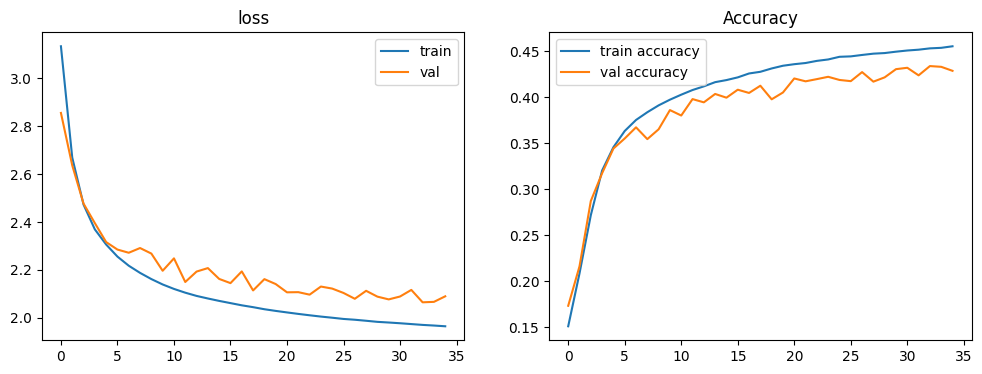

In [60]:
plot_history(history)

### Prediction

Even though the model is not perfect, you can look at its prediction with a chord of your choice. Don't forget to decode the predicted token to know which chord it corresponds to.

You will have to convert your input list of chords to a list of tokens, get the most probable output class, and then convert it back to a chord.

You should do it in a function.

In [30]:
id_to_chord = {v: k for k, v in chord_to_id.items()}

In [31]:
def get_predicted_chord(song):
    # Convert chords to numbers
    song_convert = [chord_to_id[chord] for chord in song]
    
    # Return an array of size vocab_size, with the probabilities
    pred = model.predict([song_convert], verbose=0)
    # Return the index of the highest probability
    pred_class = np.argmax(pred[0])
    # Turn the index into a chord
    pred_chord = id_to_chord[pred_class]
    
    return pred_chord

In [32]:
chords_list = [['A'], ['Am'], ['A7'], ['Bb'], ['Bbm'], ['Bb7'], ['C'], ['Cm'], ['C7'], ['Db'], ['Dbm'], ['Db7'],
              ['E'], ['Em'], ['E7'], ['F'], ['Fm'], ['F7'], ['G'], ['Gm'], ['G7'], ['Gaug']]

In [33]:
chords_list = [
['G', 'Em', 'C', 'G', 'D', 'Em', 'C', 'G', 'D', 'Em', 'G'],
['C7', 'F7'],
['C7', 'F7', 'C7'],
['C7', 'F7', 'C7', 'F7'],
['C7', 'F7', 'C7', 'F7', 'C7'],
['C7', 'F7', 'C7', 'F7', 'C7', 'G7'],
['E7', 'A7', 'E7', 'A7', 'E7', 'G7', 'F7'],
['A'],
['D', 'A'],
['E7', 'D', 'A'],
['Bb', 'D', 'A'],
['B', 'F#', 'A'],
['Cm', 'Bb', 'Ab'],
['Cm', 'Bb', 'Am'],
['Cm', 'Bb', 'G'],
['Cm', 'Bb', 'Gb'],
['Cm', 'Bb', 'F'],
['Cm', 'Bb', 'F', 'D7'],
]

for chord in chords_list:
    print(chord, get_predicted_chord(chord))

['G', 'Em', 'C', 'G', 'D', 'Em', 'C', 'G', 'D', 'Em', 'G'] C
['C7', 'F7'] C7
['C7', 'F7', 'C7'] C7
['C7', 'F7', 'C7', 'F7'] C7
['C7', 'F7', 'C7', 'F7', 'C7'] F7
['C7', 'F7', 'C7', 'F7', 'C7', 'G7'] C7
['E7', 'A7', 'E7', 'A7', 'E7', 'G7', 'F7'] A5
['A'] Am
['D', 'A'] D
['E7', 'D', 'A'] B7aug
['Bb', 'D', 'A'] C7
['B', 'F#', 'A'] A5
['Cm', 'Bb', 'Ab'] B
['Cm', 'Bb', 'Am'] A
['Cm', 'Bb', 'G'] D#m7
['Cm', 'Bb', 'Gb'] E
['Cm', 'Bb', 'F'] Bb
['Cm', 'Bb', 'F', 'D7'] D#m7


In [34]:
song = ['Gm']
song_convert = [chord_to_id[chord] for chord in song]
song_convert

[6]

In [35]:
pred = model.predict([song_convert])
pred

1/1 [==============================] - 0s 45ms/step


array([[1.3952315e-07, 5.2215494e-02, 2.3241537e-02, ..., 1.4043759e-07,
        1.4164898e-07, 1.4182119e-07]], dtype=float32)

In [36]:
song = ['Db', 'A7', 'Gbm', 'D7', 'A7', 'Bb']
get_predicted_chord(song)

'A5'

In [37]:
pred_class = np.argmax(pred[0])
pred_chord = id_to_chord[pred_class]
print(pred_class, pred_chord)

7 C7


In [38]:
pred_class_second = np.argsort(np.max(pred, axis=0))[-2]
pred_chord = id_to_chord[pred_class_second]
print(pred_class_second, pred_chord)

71 Eb


Write a function that takes a chord as an input, predicts the next chord, appends the chord to the initial list, then redoes the prediction, etc etc.

For instance :
- ['F', 'Am', 'C'] => 'G'
- ['F', 'Am', 'C', 'G'] => 'Am'
- ['F', 'Am', 'C', 'G', 'Am'] => 'G'
...

The function should also take the number of times you repeat the operation as an input.

You can have some fun trying different input sequences here.

In [39]:
def repeat_prediction(song, repetition):
    song_tmp = song
    for i in range(repetition):
        predicted_chord = get_predicted_chord(song_tmp)
        song_tmp.append(predicted_chord)
        #song_tmp = song_tmp[1:]

    return song_tmp

In [40]:
song = ['F', 'Am', 'C7']
song_tmp = song

In [41]:
#for i in range(repetition):
predicted_chord = get_predicted_chord(song_tmp)
song_tmp.append(predicted_chord)
#song_tmp = song_tmp[1:]
song_tmp

['F', 'Am', 'C7', 'Bbdim']

In [42]:
#strings = ['what i like is ', 'we try to']
song = ['F', 'Am', 'Bb', 'C7',]

repeat_prediction(song, 10)

#[repeat_prediction(s, 10) for s in song]

['F', 'Am', 'Bb', 'C7', 'F', 'C7', 'F', 'C7', 'F', 'C7', 'F', 'C7', 'F', 'C7']

In [43]:
chords_list = [
               ['G', 'Em', 'C', 'G', 'D', 'Em', 'C', 'G', 'D', 'Em', 'G']
              ]

for chord in chords_list:
    print(get_predicted_chord(chord))

C


In [44]:
songs_list = [
    # Basic progression I IV V
    ['G', 'C', 'D7', 'G', 'C', 'D7', 'G', 'C', 'D7'], # Repeat same chords
    ['Em', 'Am', 'B7', 'Em', 'Am', 'B7', 'Em', 'Am', 'B7'], # Repeat same chords
    # I VII VI V
    ['Em', 'D', 'C', 'B7', 'Em', 'D', 'C', 'B7'], # Repeat similar chords
    ['Cm', 'Bb', 'Ab', 'G7', 'Cm', 'Bb', 'Ab', 'G7'], # Repeat similar chords
    # Blues I IV I IV I V IV I V
    ['C7', 'F7', 'C7', 'F7', 'C7', 'G7'], # F7, C7, (G7), C7
    ['G7', 'C7', 'G7', 'C7', 'G7', 'D7'], # C7, G7, (D7), G7
    # I VI II V
    ['C', 'Am', 'Dm', 'G7', 'C', 'Am', 'Dm', 'G7'], # Repeat same chords
    ['Cm', 'Ab', 'Dhdim7', 'G7', 'Cm', 'Ab', 'Dhdim7', 'G7'], # Repeat same chords
    ['E', 'C#m', 'F#m', 'B7', 'E', 'C#m', 'F#m', 'B7'], # Repeat same chords
    ['Em', 'C', 'F#hdim7', 'B7', 'Em', 'C', 'F#hdim7', 'B7'], # Repeat same chords
    # Christian rock
    ['G', 'Em', 'C', 'G', 'D', 'Em', 'C', 'G', 'D', 'Em', 'G'], # Repeat similar chords
    # Rock - Hotel California
    ['Bm', 'F#7', 'A7', 'E7', 'G', 'D'], # Em7, F#7
    # Metal I-VI-IV-I-III-IV (You've Got Another Thing Comin - Judas Priest)
    ['F#m', 'D', 'B', 'F#m', 'A'], # B, F#m, A (similar chords)

    # Sammy's chords
    ['Fm', 'Abm', 'Fm', 'Abm', 'Bb7', 'Eb'],
    ['E', 'G#', 'E', 'B', 'E', 'G#', 'E', 'B'],
    ['Gm', 'Bb', 'Dm', 'Eb']
]

for song in songs_list:
    print(repeat_prediction(song, 10), "\n")

['G', 'C', 'D7', 'G', 'C', 'D7', 'G', 'C', 'D7', 'Am', 'A5', 'Am', 'A5', 'Am', 'A5', 'Am', 'A5', 'Am', 'A5'] 

['Em', 'Am', 'B7', 'Em', 'Am', 'B7', 'Em', 'Am', 'B7', 'Am', 'A5', 'Am', 'A5', 'Am', 'A5', 'Am', 'A5', 'Am', 'A5'] 

['Em', 'D', 'C', 'B7', 'Em', 'D', 'C', 'B7', 'D', 'G', 'C', 'Cm', 'G', 'C', 'Cm', 'G', 'C', 'Cm'] 

['Cm', 'Bb', 'Ab', 'G7', 'Cm', 'Bb', 'Ab', 'G7', 'B', 'A5', 'Amin', 'B', 'A5', 'Amin', 'B', 'A5', 'Amin', 'B'] 

['C7', 'F7', 'C7', 'F7', 'C7', 'G7', 'C7', 'C7', 'F7', 'C7', 'F7', 'C7', 'F7', 'C7', 'F7', 'C7'] 

['G7', 'C7', 'G7', 'C7', 'G7', 'D7', 'B', 'A5', 'Amin', 'B', 'A5', 'Amin', 'B', 'A5', 'Amin', 'B'] 

['C', 'Am', 'Dm', 'G7', 'C', 'Am', 'Dm', 'G7', 'Am', 'Dm', 'Am', 'Dm', 'Am', 'Dm', 'Am', 'Dm', 'Am', 'G5'] 

['Cm', 'Ab', 'Dhdim7', 'G7', 'Cm', 'Ab', 'Dhdim7', 'G7', 'A5', 'B', 'A5', 'A5', 'A5', 'A5', 'A5', 'A5', 'A5', 'A5'] 

['E', 'C#m', 'F#m', 'B7', 'E', 'C#m', 'F#m', 'B7', 'A5', 'A5', 'A7', 'A5', 'A7', 'A5', 'A7', 'A5', 'A7', 'A5'] 

['Em', 'C', 'F#hdim

In [79]:
chords_format = {'': ['add', 'major', 'maj', 'M', 'Major', 'Maj', '2', '4', '6'],
                     'm': ['minor', 'min'],
                     '7': ['sus', '9', '11', '13'],
                     'aug': ['augmented'],
                     'dim': ['diminished'], # ALSO "°"
                     'hdim7': ['h7', 'hdim', 'hdim7', 'h']
                     }
# !! we have to merge C# and Db, etc

One last thing: Save and load models
❗️Warning❗️ This section will be extremely important for the Data Science Projects.

There are numerous reasons you might want to save your model, send it to someone that can load and use it.

There are many options to do that. Let's see one of them.

In [5]:
from tensorflow.keras import models

# Let's say that you have a `model`
# You can save it:
#models.save_model(model, 'model_v1')

# and you can load it somewhere else:
# loaded_model = models.load_model('model_v1')

In [6]:
model = models.load_model('model_v1')

In [94]:
test = 'G'
list(test)

['G']

In [120]:
chord = ['Bb']
get_predicted_chord(chord)

'Eb'

In [128]:
input_chords = "C,D,G"
input_chords.split(",")
#list(input_chords)

['C', 'D', 'G']

In [109]:
import json
with open('chord_dict.json', 'w') as f:
    json.dump(chord_to_id, f)

In [110]:
with open("chord_dict.json", "r") as json_file:
    chord_to_id = json.load(json_file)